# Bank data analysis

The goal of your project is to create a robust classifier and use the data, where you will build a model that will recognize whether specific client will leave/unsubscribe the bank services.
Make feature engineering but also try differnet models in order to get as much accuracy as possible.




    

# Working Plan



1. Phase 1 : Dataset
    * Team Planning
    * Full git project Integration
    * General Project Research
    * Dataset Preparation
    * Dataset Feature Engineering

2. Phase 2 : Training
    * Make Research about your model
    * Compose your model (try different models) 
    * Ping Pong phase with Dataset feature engineers
    * Generate more data if needed
    * Fine tunning of your model

3. Phase 3 : Deployment
    * Perform benchmark (precision/recall), ROC curve
    * Model Deploy (Git)
    * Write git Readme.md file
    * Receive Feedback from PM

## 0. Read data, visualize, basic statistics, understand it

In [1]:
# Import Pandas,Numpy and sklearn package
import pandas as pd
from numpy import nan
import sklearn
import numpy as np

In [2]:
#pip install seaborn
!pip3 install xgboost
import seaborn as sns
#print(sns.__version__)

In [3]:
# sklearn libraries
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

In [4]:
# Visual libraries
from matplotlib import pyplot as plt

In [5]:
# Import Bank Dataset 
dataset = pd.read_csv("dataset_bank.csv")
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39.0,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34.0,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  float64
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

(10127, 21)

In [7]:
dataset.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 47
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [8]:
dataset.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,3.742297e+07,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,3.193385e+09,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,-2.147484e+09,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,3.100000e+01,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,3.600000e+01,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,4.000000e+01,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,3.210000e+11,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### Provide label encoding form pandas api

In [9]:
# Check variable data types

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

print("Numeric columns:\n")
for column in dataset.columns:
    if is_numeric_dtype(dataset[column]):
        print(column)
print("----------------------------------\n")        
print("Categorical columns:\n ")        
for column in dataset.columns:
    if is_string_dtype(dataset[column]):
        print(column)

Numeric columns:

CLIENTNUM
Customer_Age
Dependent_count
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
----------------------------------

Categorical columns:
 
Attrition_Flag
Gender
Education_Level
Marital_Status
Income_Category
Card_Category


In [10]:
# Check for missing data

for column in dataset.columns:
        if dataset[column].isnull().values.any():
            print(column)

In [11]:
# Check for Unknown data

print('\n', dataset['Marital_Status'].value_counts())
print('\n', dataset['Education_Level'].value_counts())
print('\n', dataset['Income_Category'].value_counts())


 Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

 Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

 Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64


## 1. Data preprocessing, normalization, missing data, categorical data

### Explanatory Data Analysis - EDA

### Missing and unknown values

In [12]:
# Raplacement of the 'Unknown' data with NaN 

columns = ['Marital_Status','Education_Level','Income_Category']
dataset[columns]= dataset[columns].replace('Unknown', nan)

In [13]:
# Check for missing values

for column in dataset.columns:
        if dataset[column].isnull().values.any():
            print(column)

Education_Level
Marital_Status
Income_Category


In [14]:
# Replacement of NaN values with 'most_frequent'

simple_imputer = SimpleImputer(strategy='most_frequent')
dataset[columns] = simple_imputer.fit_transform(dataset[columns])


In [15]:
# Drop the column CLIENTNUM                   
dataset = dataset.drop(["CLIENTNUM"], axis = 1)

In [16]:
dataset.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,3.742297e+07,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,3.193385e+09,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,-2.147484e+09,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,3.100000e+01,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,3.600000e+01,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,4.000000e+01,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,3.210000e+11,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


#### Identifying Outliers with Interquartile Range (IQR)

In [17]:
# Check for 'Months_on_book' column
# The first line of code below prints the skewness value for the 'Months_on_book'
# while the second line prints the summary statistics.

print(dataset['Months_on_book'].skew())
dataset['Months_on_book'].describe()

100.29059631376872


count    1.012700e+04
mean     3.742297e+07
std      3.193385e+09
min     -2.147484e+09
25%      3.100000e+01
50%      3.600000e+01
75%      4.000000e+01
max      3.210000e+11
Name: Months_on_book, dtype: float64

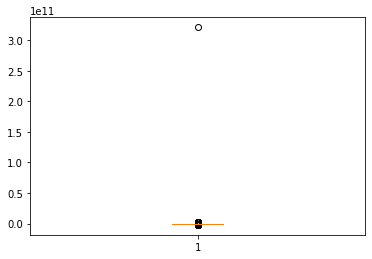

<AxesSubplot:>

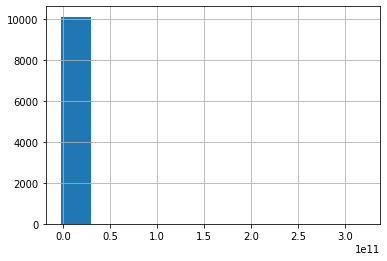

In [18]:
#Identifying Outliers with Visualization

plt.boxplot(dataset["Months_on_book"])
plt.show() 
dataset.Months_on_book.hist()

#The above chart shows that the distribution is right-skewed, 
#and there are extreme higher values at the right of the histogram.

In [19]:
# It is obiviously that 'Months_on_book' feauture has outliers as it is min. value =-2.147484e+09 and max. value =3.210000e+11
#The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between 
# the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1

Q1 = dataset['Months_on_book'].quantile(0.25)
Q3 = dataset['Months_on_book'].quantile(0.75)
IQR = Q3 - Q1

print('The interquartile range (IQR):',IQR)

The interquartile range (IQR): 9.0


#### Outlier Treatment

In [20]:
# The values range and most common value

print("The range between min and max values without outliers is from", 
      dataset['Months_on_book'].quantile(0.002),'up to', dataset['Months_on_book'].quantile(0.99))

print("The most common values are between:", 
      dataset['Months_on_book'].quantile(0.50),'and', dataset['Months_on_book'].quantile(0.95))


The range between min and max values without outliers is from 13.0 up to 56.0
The most common values are between: 36.0 and 50.0


In [21]:
# Replacing Outliers (the extreme values) with median values. 
# It is advised to not use MEAN values as they are affected by outliers.

dataset['Months_on_book'] = np.where(dataset['Months_on_book'] > 56, 36, dataset['Months_on_book'])
dataset['Months_on_book'] = np.where(dataset['Months_on_book'] < 13, 36, dataset['Months_on_book'])
print('New skewness value =', dataset['Months_on_book'].skew())

dataset.describe()

New skewness value = -0.10693284673560063


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.929397,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986301,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [22]:
# Check for missing values and dataset description.

for column in dataset.columns:
        if dataset[column].isnull().values.any():
            print(column)
dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39.0,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,34.0,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [23]:
# Check for Categorical and Numeric columns.

categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
numeric_columns=[x for x in dataset.dtypes.index if is_numeric_dtype(dataset[x])]

print ('Categorical columns:\n',categorical_columns)
print('\nNumeric columns:\n',numeric_columns)

Categorical columns:
 ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

Numeric columns:
 ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


Text(0, 0.5, 'Frequency')

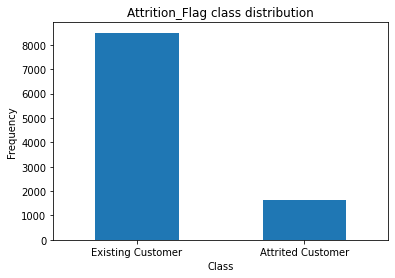

In [24]:
# class  Frequency

labels = ['Existing Customer','Attrited Customer']
classes = pd.value_counts(dataset['Attrition_Flag'], sort = True)
classes.plot(kind = 'bar', rot=0)

plt.title("Attrition_Flag class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

#### SMOTE-Unbalanced dataset

In [25]:
## Ne go pustaj :)

# print (categorical_columns)
# print(numeric_columns)

# rows = 5
# columns = 3

# figure = plt.figure(figsize=(15,20))
# for idx, col in enumerate(numeric_columns, start=1):
#    col_values = [dataset[col].values]
#    plt_seaborn = sns.distplot(col_values)
#    cell = plt.subplot(5, 3, idx)
#    plt_seaborn.plot()
#    plt.title(col)

In [26]:
class_ExistingCustomer= dataset.query('Attrition_Flag == "Existing Customer"')
class_AttritedCustomer= dataset.query('Attrition_Flag == "Attrited Customer"')

<AxesSubplot:>

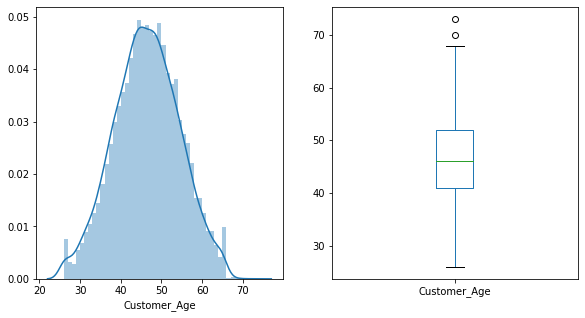

In [27]:
# distribution of Customer_Age
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(dataset['Customer_Age'], label='Customer_Age')

plt.subplot(132)
dataset['Customer_Age'].plot(kind='box', label="Customer_Age")


<AxesSubplot:title={'center':'Age with Churned or not'}, xlabel='Customer_Age', ylabel='count'>

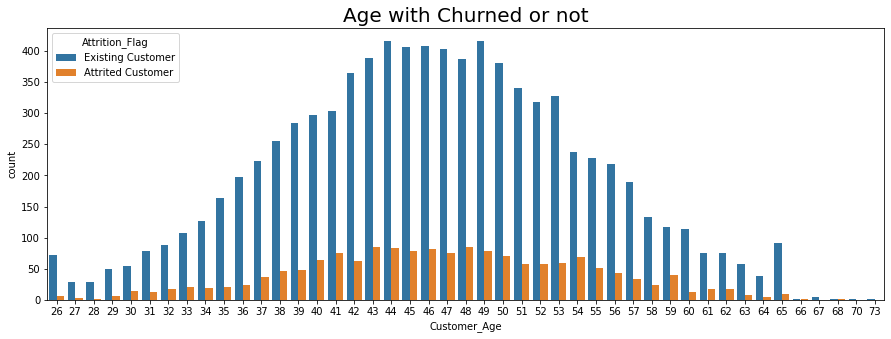

In [28]:
#age = pd.crosstab(dataset['Customer_Age'], dataset['Attrition_Flag'])
plt.figure(figsize = (15,5))
plt.title("Age with Churned or not", fontsize = 20)
sns.countplot(data = dataset, x = dataset["Customer_Age"], hue = "Attrition_Flag")

#dataset.groupby('Customer_Age')["Attrition_Flag"].value_counts().unstack()

#Customer age follows normal distribution , also approximately same proportion of churning customers 
#78% of the customers are in age range between 36-56y, so we have to pay attention to the behavior of the features in this particular range so we may find some pattern for better prediction

Attrition_Flag,Attrited Customer,Existing Customer
Dependent_count,,
0,135,769
1,269,1569
2,417,2238
3,482,2250
4,260,1314
5,64,360


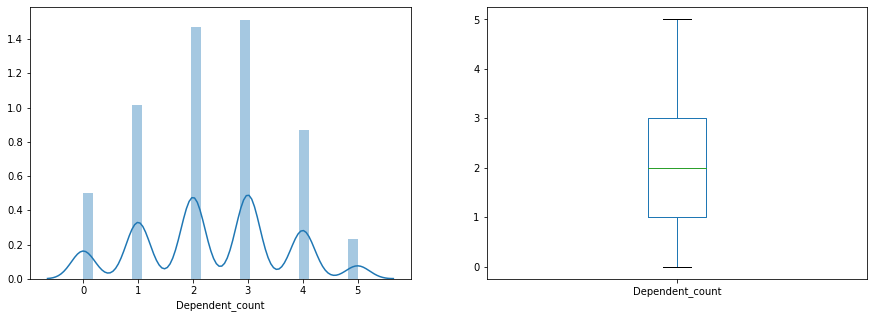

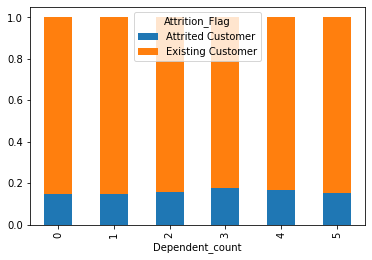

In [29]:
# distribution of Dependent_count(close family size)

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.distplot(dataset['Dependent_count'], label='Dependent_count')

plt.subplot(122)
dataset['Dependent_count'].plot(kind='box', label="Dependent_count")

#plt.subplot(133)
#sns.set(style="darkgrid")
#sns.countplot(x="Customer_Age", hue="Dependent_count", data=dataset)

data= pd.crosstab(dataset['Dependent_count'], dataset['Attrition_Flag'])
data.div(data.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

data 

# The distribution of Dependent counts is fairly normally distributed.
# Аpproximately same proportion of churning customers, not depending on number of dependents (close family size)
# Customers in age groups 36-56 have 2-3 dependents

F    5358
M    4769
Name: Gender, dtype: int64

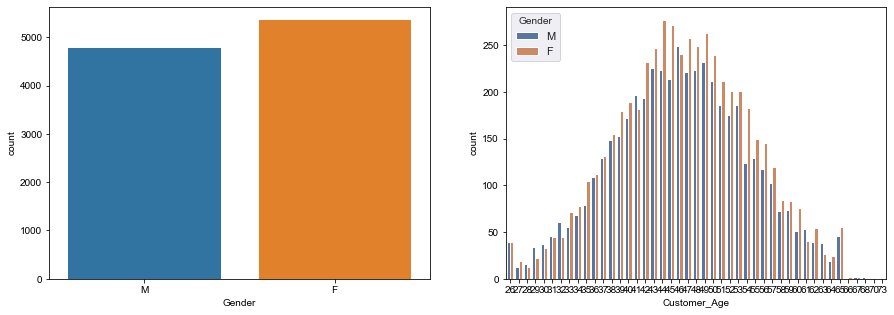

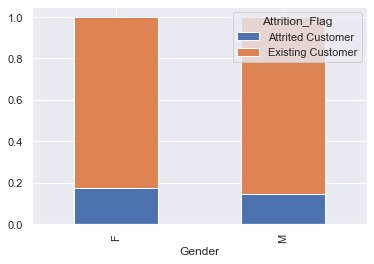

In [30]:
#Gender distribution

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(dataset['Gender'])

plt.subplot(122)
sns.set(style="darkgrid")
sns.countplot(x="Customer_Age", hue="Gender", data=dataset)

gender= pd.crosstab(dataset['Gender'], dataset['Attrition_Flag'])
gender.div(gender.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

dataset['Gender'].value_counts()

# The Bank has more female cusomers than male generally, and also divided by age groups
# Female has a higher but not significent  proportion of attrition compared to males.

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated
Attrition_Flag,,,,,,
Attrited Customer,154,95,743,306,92,237
Existing Customer,859,356,3904,1707,424,1250


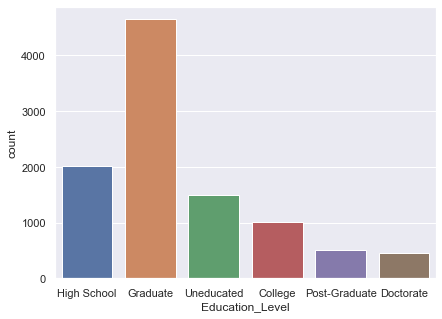

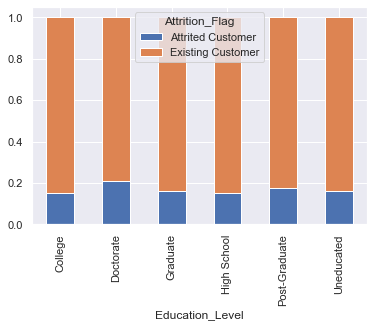

In [31]:
#Education_Level distribution

education = pd.crosstab(dataset['Education_Level'], dataset['Attrition_Flag'])
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(dataset['Education_Level'])

#plt.subplot(122)
#sns.set(style="darkgrid")
#sns.countplot(x="Customer_Age", hue="Education_Level", data=dataset)

education.div(education.sum(axis=1), axis=0).plot(kind="bar", stacked=True)
dataset.groupby('Attrition_Flag')["Education_Level"].value_counts().unstack()

#Majority of clients have level of eduction high school and graduate

Married     5436
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

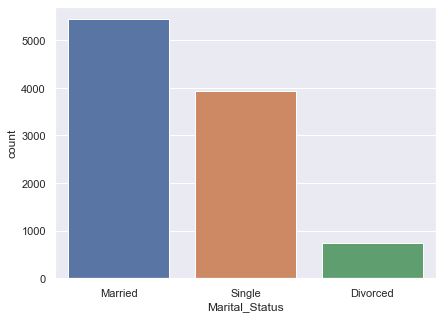

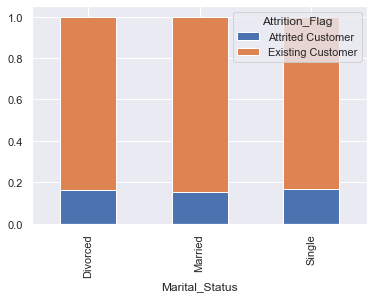

In [32]:
# Marital_Status distribution

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(dataset['Marital_Status'])
#plt.subplot(122)
#sns.set(style="darkgrid")
#sns.countplot(x="Customer_Age", hue="Marital_Status", data=dataset)

marital= pd.crosstab(dataset['Marital_Status'], dataset['Attrition_Flag'])
marital.div(marital.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

dataset['Marital_Status'].value_counts()

#Majority of the dataset is Married or Single, same proprtion of leaving

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K
Attrition_Flag,,,,,
Attrited Customer,126,271,189,242,799
Existing Customer,601,1519,1213,1293,3874


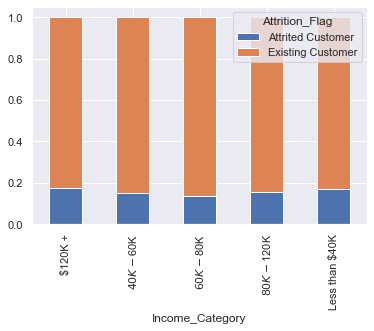

In [33]:
#Income_Category
income= pd.crosstab(dataset['Income_Category'], dataset['Attrition_Flag'])
income.div(income.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

dataset.groupby('Attrition_Flag')["Income_Category"].value_counts().unstack()

Card_Category,Blue,Gold,Platinum,Silver
Attrition_Flag,,,,
Attrited Customer,1519,21,5,82
Existing Customer,7917,95,15,473


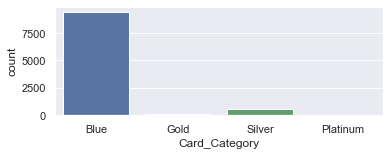

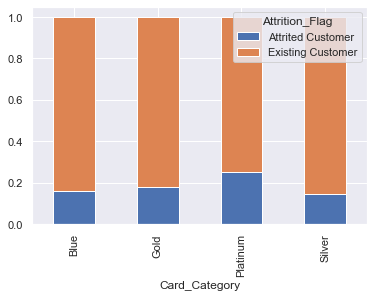

In [34]:
# distribution of Card_Category-
cards= pd.crosstab(dataset['Card_Category'], dataset['Attrition_Flag'])
plt.figure(figsize=(20,2))
plt.subplot(131)
sns.countplot(dataset['Card_Category'])

cards.div(cards.sum(axis=1), axis=0).plot(kind="bar", stacked=True)
dataset.groupby('Attrition_Flag')["Card_Category"].value_counts().unstack()



In [35]:
#plt.subplot(121)
#sns.set(style="darkgrid")
#sns.countplot(x="Customer_Age", hue="Card_Category", data=dataset)

#plt.subplot(121)
#sns.boxplot(x = "Card_Category", y = "Credit_Limit", data=dataset)

#card = class_ExistingCustomer.Card_Category.value_counts()
#Majority of the data in Card_category is using Blue Card,but the proportion of attrition compared to other types of card is proper to the datset

<AxesSubplot:>

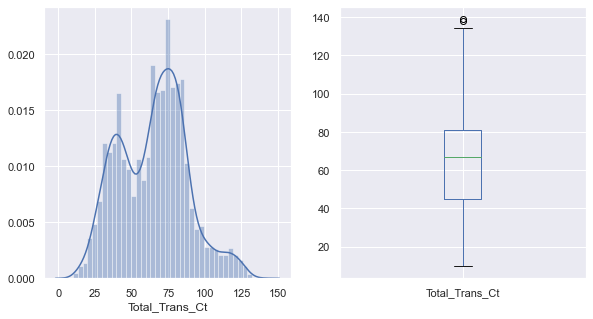

In [36]:
# distribution of Total_Trans_Ct

plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(dataset['Total_Trans_Ct'], label='Total_Trans_Ct')

plt.subplot(132)
dataset['Total_Trans_Ct'].plot(kind='box', label="Total_Trans_Ct")

#plt.subplot(133)
#sns.boxplot(x = "Customer_Age", y = "Total_Trans_Ct", data=dataset)

# we have some underlying groups in our data

Months_Inactive_12_mon,0,1,2,3,4,5,6
Attrition_Flag,,,,,,,
Attrited Customer,15,100,505,826,130,32,19
Existing Customer,14,2133,2777,3020,305,146,105


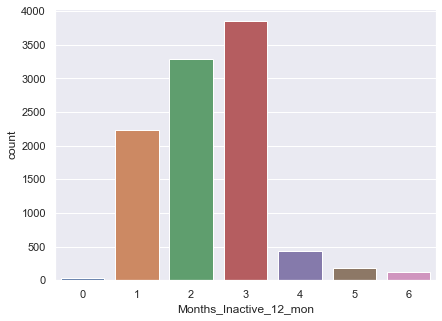

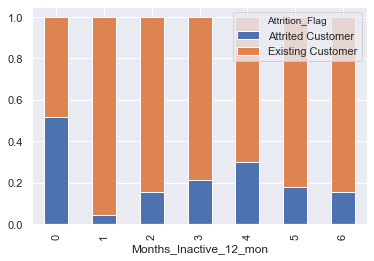

In [37]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(dataset['Months_Inactive_12_mon'])

#plt.subplot(122)
#sns.set(style="darkgrid")
#sns.countplot(x="Customer_Age", hue="Months_Inactive_12_mon", data=dataset)

inactive= pd.crosstab(dataset['Months_Inactive_12_mon'], dataset['Attrition_Flag'])
inactive.div(inactive.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

dataset.groupby('Attrition_Flag')["Months_Inactive_12_mon"].value_counts().unstack()

# Most od the clienst were inactive 1-3 months
# Majority of the clients who abandoned the Bank were inactive approximately 4 months or less than a month, 
# so here we have some diversity about inactive months and clients who left

Total_Relationship_Count,1,2,3,4,5,6
Attrition_Flag,,,,,,
Attrited Customer,233,346,400,225,227,196
Existing Customer,677,897,1905,1687,1664,1670


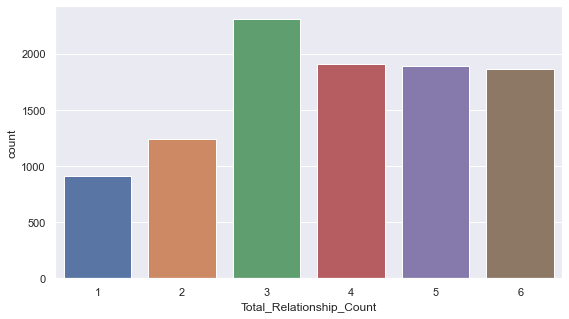

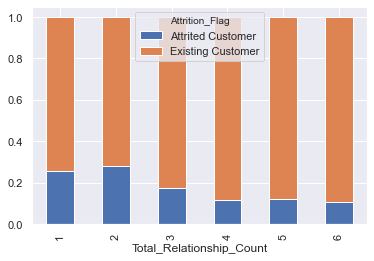

In [38]:
# distribution of Total_Relationship_Count-Total no. of products held by the customer

plt.figure(figsize=(20,5))

#plt.subplot(121)
#sns.set(style="darkgrid")
#sns.countplot(x="Customer_Age", hue="Total_Relationship_Count", data=dataset)

plt.subplot(122)
sns.countplot(dataset['Total_Relationship_Count'])

products=pd.crosstab(dataset['Total_Relationship_Count'], dataset['Attrition_Flag'])
products.div(products.sum(axis=1), axis=0).plot(kind="bar", stacked=True)              
products 

dataset.groupby('Attrition_Flag')["Total_Relationship_Count"].value_counts().unstack()

# Majority of the clients held 3 or more products
# Bank clients who held more products stayed in the Bank

Attrition_Flag,Attrited Customer,Existing Customer
Contacts_Count_12_mon,,
0,7,392
1,108,1391
2,403,2824
3,681,2699
4,315,1077
5,59,117
6,54,0


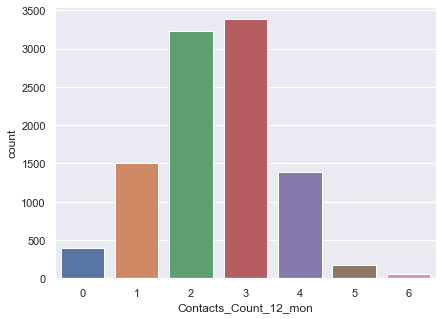

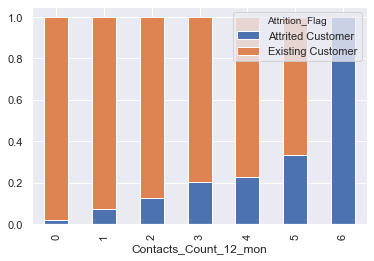

In [39]:
# distribution of Contacts_Count_12_mon- No. of Contacts in the last 12 months

plt.figure(figsize=(15,5))

#plt.subplot(122)
#sns.set(style="darkgrid")
#sns.countplot(x="Customer_Age", hue="Contacts_Count_12_mon", data=dataset)

plt.subplot(121)
sns.countplot(dataset['Contacts_Count_12_mon'])

contacts=pd.crosstab(dataset['Contacts_Count_12_mon'], dataset['Attrition_Flag'])
contacts.div(contacts.sum(axis=1), axis=0).plot(kind="bar", stacked=True)              
contacts 

# The attrition class who has a higher No. of Contacts in the last 12 months compared to the existing customers class

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Amt_Chng_Q4_Q1'>

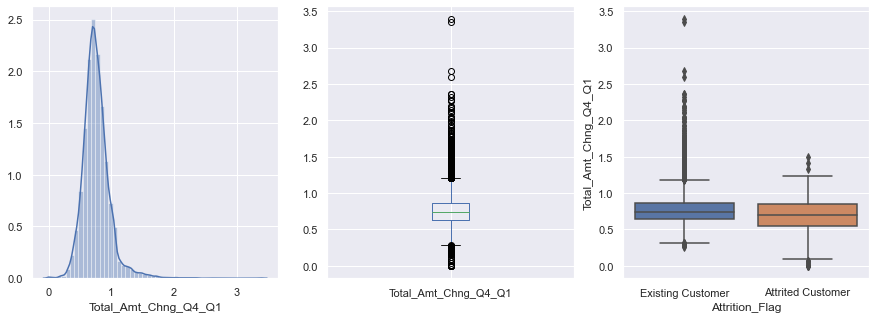

In [40]:
# distribution of Total_Amt_Chng_Q4_Q1(Change in Transaction Amount (Q4 over Q1))

plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(dataset['Total_Amt_Chng_Q4_Q1'], label='Total_Amt_Chng_Q4_Q1')

plt.subplot(132)
dataset['Total_Amt_Chng_Q4_Q1'].plot(kind='box', label="Total_Amt_Chng_Q4_Q1")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Total_Amt_Chng_Q4_Q1", data=dataset)

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1_norm'>

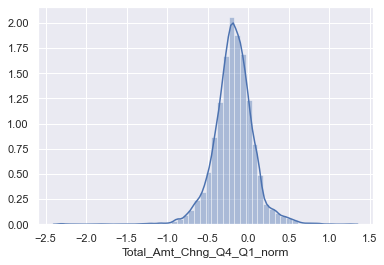

In [41]:
#Log Transform on skewed data Total_Amt_Chng_Q4_Q1

dataset = dataset.assign(Total_Amt_Chng_Q4_Q1_norm = np.log(dataset['Total_Amt_Chng_Q4_Q1']+0.1))
sns.distplot(dataset['Total_Amt_Chng_Q4_Q1_norm'], label='Total_Amt_Chng_Q4_Q1_norm')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Ct_Chng_Q4_Q1'>

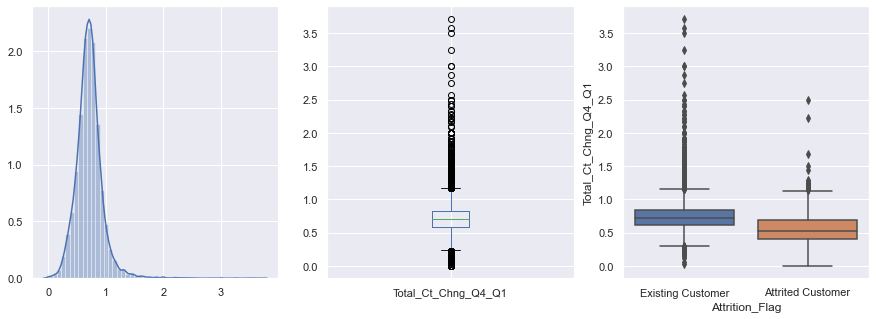

In [42]:
# distribution of Total_Ct_Chng_Q4_Q1-(Change in Transaction Count (Q4 over Q1))

plt.figure(figsize=(15,5))
plt.subplot(131)
Total_Ct_Chng_Q4_Q1 = [dataset['Total_Ct_Chng_Q4_Q1'].values]
sns.distplot(Total_Ct_Chng_Q4_Q1)

plt.subplot(132)
dataset['Total_Ct_Chng_Q4_Q1'].plot(kind='box', label="Total_Ct_Chng_Q4_Q1")
plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Total_Ct_Chng_Q4_Q1", data=dataset)

#The attrition class has a lower Change in Transaction Count compared to the existing customers class

<AxesSubplot:>

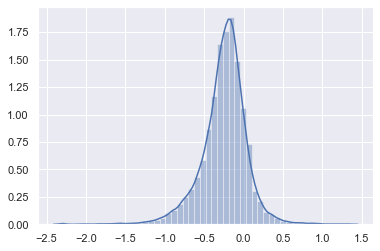

In [43]:
#Log Transform on skewed data Total_Ct_Chng_Q4_Q1

dataset = dataset.assign(Total_Ct_Chng_Q4_Q1_norm = np.log(dataset['Total_Ct_Chng_Q4_Q1']+0.1))

Total_Ct_Chng_Q4_Q1_norm = [dataset['Total_Ct_Chng_Q4_Q1_norm'].values]
sns.distplot(Total_Ct_Chng_Q4_Q1_norm)

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

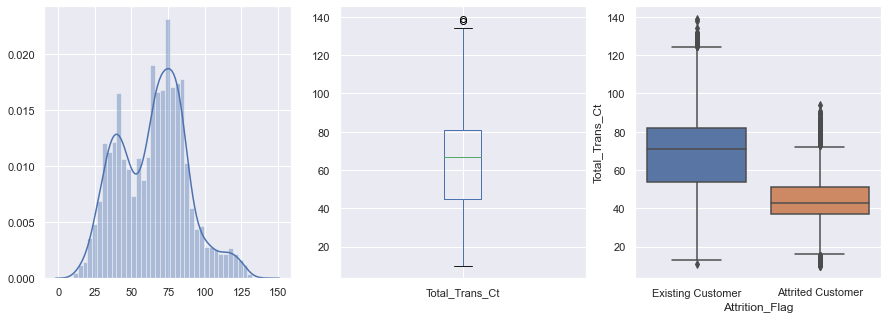

In [44]:
# distribution of Total_Trans_Ct(Total Transaction Count (Last 12 months))
plt.figure(figsize=(15,5))
plt.subplot(131)
Months_on_book = [dataset['Total_Trans_Ct'].values]
sns.distplot(Months_on_book)

plt.subplot(132)
dataset['Total_Trans_Ct'].plot(kind='box', label="Total_Trans_Ct")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Total_Trans_Ct", data=dataset)
#Outliers
#we have some underlying groups in our data
#The attrition class has a lower total transaction count compared to the existing customers class

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Amt'>

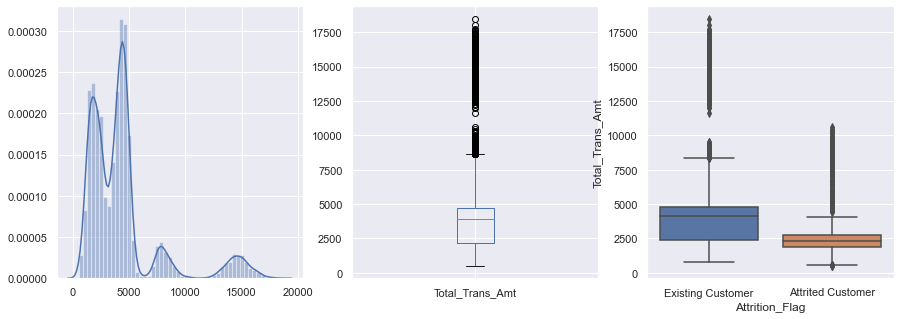

In [45]:
# distribution of Total_Trans_Amt-Total Transaction Amount (Last 12 months)

plt.figure(figsize=(15,5))
plt.subplot(131)
Total_Trans_Amt = [dataset['Total_Trans_Amt'].values]
sns.distplot(Total_Trans_Amt)

plt.subplot(132)
dataset['Total_Trans_Amt'].plot(kind='box', label="Total_Trans_Amt")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Total_Trans_Amt", data=dataset)

#The attrition class has a lower Total Transaction Amount compared to the existing customers class
#we have some underlying groups in our data

<AxesSubplot:xlabel='Total_Trans_Amt_norm'>

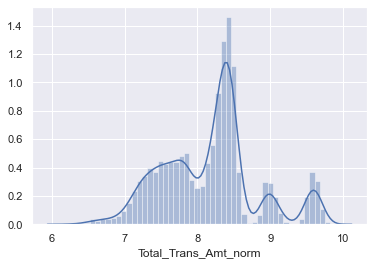

In [46]:
#Log Transform on skewed data Total_Trans_Amt

dataset = dataset.assign(Total_Trans_Amt_norm = np.log(dataset['Total_Trans_Amt']+0.1))
sns.distplot(dataset['Total_Trans_Amt_norm'], label='Total_Trans_Amt')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Open_To_Buy'>

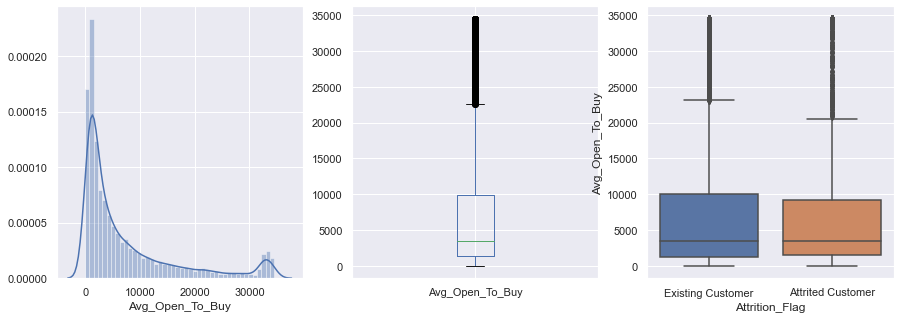

In [47]:
# distribution of Avg_Open_To_Buy
# (The difference between the credit limit assigned to a cardholder account and the present balance on the account)

plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(dataset['Avg_Open_To_Buy'], label='Avg_Open_To_Buy')

plt.subplot(132)
dataset['Avg_Open_To_Buy'].plot(kind='box', label="Avg_Open_To_Buy")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Avg_Open_To_Buy", data=dataset)

#Customers 

<AxesSubplot:xlabel='Avg_Open_To_Buy_norm'>

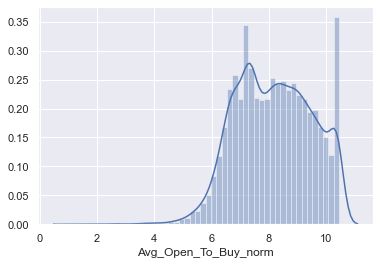

In [48]:
#Log Transform on skewed data Avg_Open_To_Buy

dataset = dataset.assign(Avg_Open_To_Buy_norm = np.log(dataset['Avg_Open_To_Buy']+0.1))
sns.distplot(dataset['Avg_Open_To_Buy_norm'], label='Avg_Open_To_Buy_norm')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

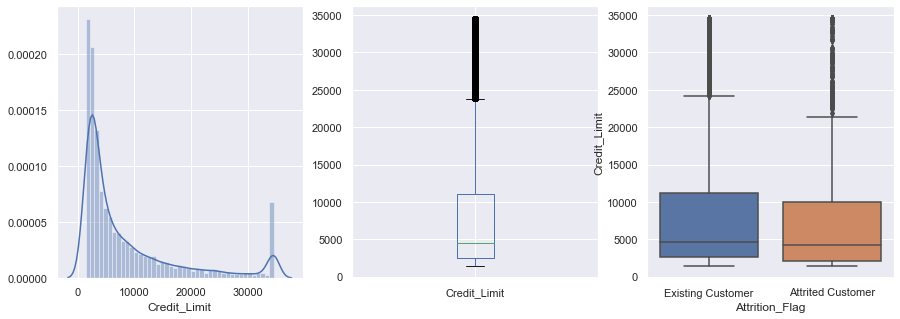

In [49]:
# distribution of Credit_Limit
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(dataset['Credit_Limit'], label='Credit_Limit')

plt.subplot(132)
dataset['Credit_Limit'].plot(kind='box', label="Credit_Limit")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Credit_Limit", data=dataset)

#skew  to the left ,outliers,same data distribution of churning and existing customers,not significent influence of feature Credit limt to the class

<AxesSubplot:xlabel='Credit_Limit_norm'>

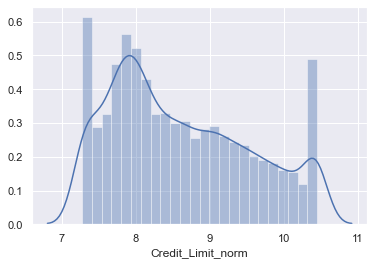

In [50]:
#Log Transform on skewed data Credit_Limit

dataset = dataset.assign(Credit_Limit_norm = np.log(dataset['Credit_Limit']+0.1))
sns.distplot(dataset['Credit_Limit_norm'], label='Credit_Limit_norm')

<AxesSubplot:>

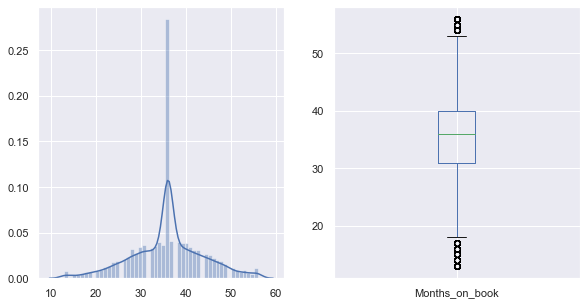

In [51]:
# distribution of Months_on_book 
plt.figure(figsize=(15,5))
plt.subplot(131)
Months_on_book = [dataset['Months_on_book'].values]
sns.distplot(Months_on_book)

plt.subplot(132)
dataset['Months_on_book'].plot(kind='box', label="Months_on_book")

#plt.subplot(133)
#sns.boxplot(x = "Customer_Age", y = "Months_on_book", data=dataset)

# Outliers-done

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

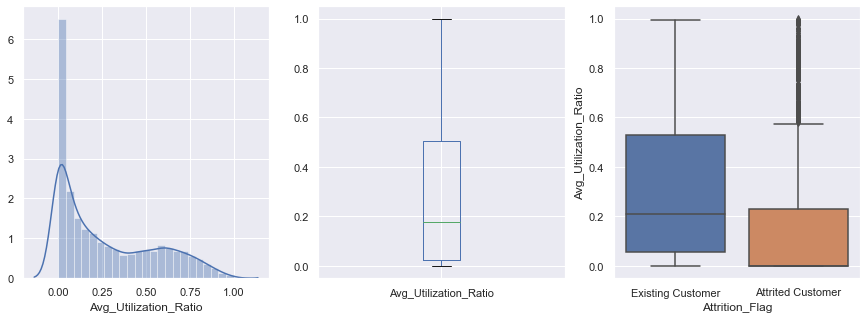

In [52]:
# distribution of Avg_Utilization_Ratio(credit utilization ratio is how much you owe on all your revolving accounts, 
# such as credit cards, compared with your total available credit — expressed as a percentage. 
# It's important because it's one of the biggest factors in your credit score.)
# Experts suggest using no more than 30% of your limits, and less is better. 
# Charging too much on your cards, especially if you max them out, is associated with being a higher credit risk. 
# That’s why running up your cards will lower your score

plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(dataset['Avg_Utilization_Ratio'], label='Avg_Utilization_Ratio')

plt.subplot(132)
dataset['Avg_Utilization_Ratio'].plot(kind='box', label="Avg_Utilization_Ratio")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Avg_Utilization_Ratio", data=dataset)

#Churning customers  most of them have Avg_Utilization_Ratio under 30%, but also significent proportion ( about 20%) are 
# leaving the Bank with higher Avg_Utilization_Ratio Outliers

<AxesSubplot:xlabel='Avg_Utilization_Ratio_norm'>

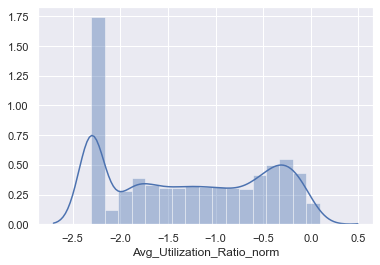

In [53]:
#Log Transform on skewed data

dataset = dataset.assign(Avg_Utilization_Ratio_norm = np.log(dataset['Avg_Utilization_Ratio']+0.1))
sns.distplot(dataset['Avg_Utilization_Ratio_norm'], label='Avg_Utilization_Ratio_norm')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

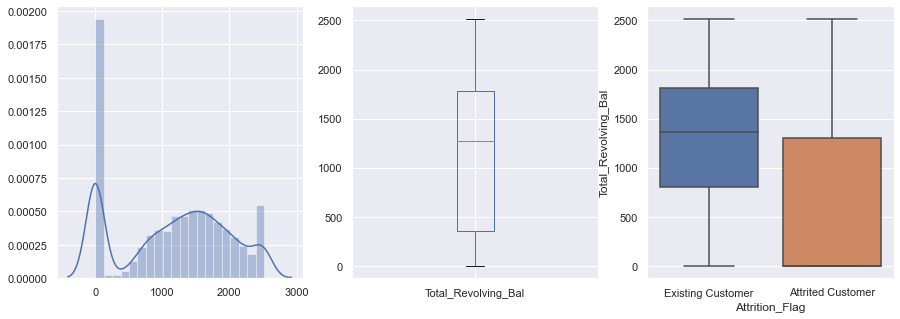

In [54]:
# distribution of Total_Revolving_Bal-Total Revolving Balance on the Credit Card

plt.figure(figsize=(15,5))
plt.subplot(131)
Total_Revolving_Bal = [dataset['Total_Revolving_Bal'].values]
sns.distplot(Total_Revolving_Bal)

plt.subplot(132)
dataset['Total_Revolving_Bal'].plot(kind='box', label="Total_Revolving_Bal")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Total_Revolving_Bal", data=dataset)

#The attrition class has a lower total revolving balance compared to the existing customers class

## Scaling

In [55]:
#RobustScaler

from sklearn.preprocessing import RobustScaler

columns = ['Total_Ct_Chng_Q4_Q1_norm','Credit_Limit_norm','Avg_Open_To_Buy_norm','Total_Amt_Chng_Q4_Q1_norm','Avg_Utilization_Ratio_norm']
transformer = RobustScaler()

dataset[columns] = transformer.fit_transform(dataset[columns])

In [56]:
#Min-Max Scaler -Age
from sklearn.preprocessing import MinMaxScaler

column = ['Customer_Age']

transformer = MinMaxScaler(feature_range=(0,1))
dataset[column] = transformer.fit_transform(dataset[column])

In [57]:
print("Minimum value of Age is :", dataset['Customer_Age'].min())
print("Maximum value of Age is :", dataset['Customer_Age'].max())

Minimum value of Age is : 0.0
Maximum value of Age is : 0.9999999999999999


In [58]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler

column_ = ['Total_Revolving_Bal','Total_Trans_Amt']
transformer = StandardScaler()
dataset[column_] = transformer.fit_transform(dataset[column_])

In [59]:
dataset.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Amt_Chng_Q4_Q1_norm,Total_Ct_Chng_Q4_Q1_norm,Total_Trans_Amt_norm,Avg_Open_To_Buy_norm,Credit_Limit_norm,Avg_Utilization_Ratio_norm
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,1.012700e+04,10127.000000,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.432467,2.346203,35.929397,3.812580,2.341167,2.455317,8631.953698,-1.830898e-15,7469.139637,0.759941,-5.134192e-16,64.858695,0.712222,0.274894,-0.007410,-0.094299,8.164851,0.005387,0.123303,0.005366
std,0.170571,1.298908,7.986301,1.554408,1.010622,1.106225,9088.776650,1.000049e+00,9090.685324,0.219207,1.000049e+00,23.472570,0.238086,0.275691,0.913933,0.982105,0.654434,0.653272,0.636968,0.499878
min,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,-1.426858e+00,3.000000,0.000000,-1.146344e+00,10.000000,0.000000,0.000000,-7.821855,-7.005937,6.234607,-3.498103,-0.785438,-0.638617
25%,0.319149,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,-9.863389e-01,1324.500000,0.631000,-6.619405e-01,45.000000,0.582000,0.023000,-0.494388,-0.545412,7.675824,-0.480363,-0.393496,-0.508398
50%,0.425532,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1.388875e-01,3474.000000,0.736000,-1.486877e-01,67.000000,0.702000,0.176000,0.000000,0.000000,8.268501,0.000000,0.000000,0.000000
75%,0.553191,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,7.622408e-01,9859.000000,0.859000,9.918090e-02,81.000000,0.818000,0.503000,0.505612,0.454588,8.464024,0.519637,0.606504,0.491602
max,1.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,1.661686e+00,34516.000000,3.397000,4.144855e+00,139.000000,3.714000,0.999000,5.271271,5.247290,9.824666,1.143879,1.382396,0.869174


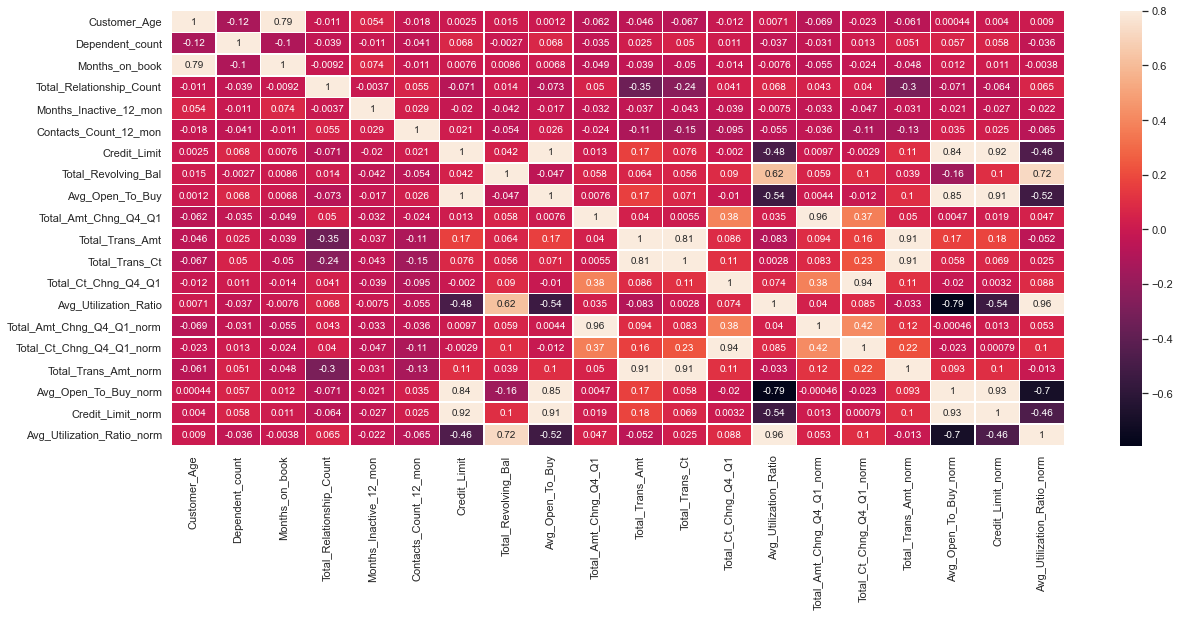

In [60]:
# Heatmap - correlation of features

correlation_matrix = dataset.corr()
top_corr_features = correlation_matrix.index
fig = plt.figure(figsize=(20,8))

sns.heatmap(dataset[top_corr_features].corr(), vmax=0.8, annot=True, linewidths=.5)
plt.show() 

In [61]:
# Calculate skew and sort
# The coefficient of skewness is a measure of asymmetry in the distribution.
# A positive skew indicates a longer tail to the right, while a negative skew indicates a longer tail to the left.
# A perfectly symmetric distribution, like the normal distribution, has a skew equal to zero.

skew_feats = dataset[numeric_columns].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'skew':skew_feats})

skewness

,skew
Total_Ct_Chng_Q4_Q1,2.064031
Total_Trans_Amt,2.041003
Total_Amt_Chng_Q4_Q1,1.732063
Credit_Limit,1.666726
Avg_Open_To_Buy,1.661697
Avg_Utilization_Ratio,0.718008
Months_Inactive_12_mon,0.633061
Total_Trans_Ct,0.153673
Contacts_Count_12_mon,0.011006
Dependent_count,-0.020826


In [62]:
dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Amt_Chng_Q4_Q1_norm,Total_Ct_Chng_Q4_Q1_norm,Total_Trans_Amt_norm,Avg_Open_To_Buy_norm,Credit_Limit_norm,Avg_Utilization_Ratio_norm
0,Existing Customer,0.404255,M,3,High School,Married,$60K - $80K,Blue,39.0,5,...,-0.959707,42,1.625,0.061,1.990188,2.577244,7.042374,0.613957,0.699877,-0.339048
1,Existing Customer,0.489362,F,5,Graduate,Single,Less than $40K,Blue,44.0,6,...,-0.916433,33,3.714,0.105,2.484302,5.247290,7.163250,0.376168,0.406583,-0.187070
2,Existing Customer,0.531915,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4,...,-0.740982,20,2.333,0.000,4.310314,3.734496,7.542797,-0.008096,-0.194992,-0.638617
3,Existing Customer,0.297872,F,4,High School,Married,Less than $40K,Blue,34.0,3,...,-0.951758,20,2.333,0.760,2.165628,3.734496,7.065699,-0.734010,-0.216276,0.714920
4,Existing Customer,0.297872,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5,...,-1.056263,28,2.500,0.000,3.687622,3.957893,6.704537,0.152269,0.024594,-0.638617


### Choosing target columns

In [63]:
# Mapping Attrited_Flag

mapper = {'Attrited Customer': 1, 'Existing Customer': 0}
dataset = dataset.assign(Attrition_Flag = dataset['Attrition_Flag'].replace(mapper))
dataset

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Amt_Chng_Q4_Q1_norm,Total_Ct_Chng_Q4_Q1_norm,Total_Trans_Amt_norm,Avg_Open_To_Buy_norm,Credit_Limit_norm,Avg_Utilization_Ratio_norm
0,0,0.404255,M,3,High School,Married,$60K - $80K,Blue,39.0,5,...,-0.959707,42,1.625,0.061,1.990188,2.577244,7.042374,0.613957,0.699877,-0.339048
1,0,0.489362,F,5,Graduate,Single,Less than $40K,Blue,44.0,6,...,-0.916433,33,3.714,0.105,2.484302,5.247290,7.163250,0.376168,0.406583,-0.187070
2,0,0.531915,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4,...,-0.740982,20,2.333,0.000,4.310314,3.734496,7.542797,-0.008096,-0.194992,-0.638617
3,0,0.297872,F,4,High School,Married,Less than $40K,Blue,34.0,3,...,-0.951758,20,2.333,0.760,2.165628,3.734496,7.065699,-0.734010,-0.216276,0.714920
4,0,0.297872,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5,...,-1.056263,28,2.500,0.000,3.687622,3.957893,6.704537,0.152269,0.024594,-0.638617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,0.510638,M,2,Graduate,Single,$40K - $60K,Blue,40.0,3,...,3.259358,117,0.857,0.462,-0.148351,0.594596,9.647052,-0.238577,-0.087221,0.447308
10123,1,0.319149,M,2,Graduate,Divorced,$40K - $60K,Blue,25.0,4,...,1.283475,69,0.683,0.511,0.288056,-0.080681,9.078419,-0.252901,-0.042058,0.499893
10124,1,0.382979,F,1,High School,Married,Less than $40K,Blue,36.0,5,...,1.732994,60,0.818,0.000,0.348675,0.454588,9.239035,0.220570,0.118118,-0.638617
10125,1,0.085106,M,2,Graduate,Married,$40K - $60K,Blue,36.0,4,...,1.174848,62,0.722,0.000,-1.012988,0.082888,9.035403,0.208640,0.101782,-0.638617


In [64]:
X = dataset.drop(['Attrition_Flag'], axis = 1)
y = dataset['Attrition_Flag']

## CatBoost Encoding

In [65]:
cat_features = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

In [66]:
import category_encoders as ce

count_encoder = ce.CatBoostEncoder(cols=cat_features)

X[cat_features] = count_encoder.fit_transform(X[cat_features],y)

In [67]:
X.head()
X.shape

(10127, 25)

In [80]:
X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Ct,Total_Amt_Chng_Q4_Q1_norm,Total_Ct_Chng_Q4_Q1_norm,Total_Trans_Amt_norm,Avg_Open_To_Buy_norm,Credit_Limit_norm,Avg_Utilization_Ratio_norm
0,0.404255,0.16066,3,0.160660,0.16066,0.160660,0.16066,39.0,5,1,3,-0.473422,42,1.990188,2.577244,7.042374,0.613957,0.699877,-0.339048
1,0.489362,0.08033,5,0.080330,0.08033,0.080330,0.16066,44.0,6,1,2,-0.366667,33,2.484302,5.247290,7.163250,0.376168,0.406583,-0.187070
2,0.531915,0.16066,3,0.160660,0.16066,0.053553,0.16066,36.0,4,1,0,-1.426858,20,4.310314,3.734496,7.542797,-0.008096,-0.194992,-0.638617
3,0.297872,0.08033,4,0.080330,0.16066,0.160660,0.16066,34.0,3,4,1,1.661686,20,2.165628,3.734496,7.065699,-0.734010,-0.216276,0.714920
4,0.297872,0.16066,3,0.053553,0.16066,0.080330,0.16066,21.0,5,1,0,-1.426858,28,3.687622,3.957893,6.704537,0.152269,0.024594,-0.638617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.510638,0.16066,2,0.160660,0.16066,0.160660,0.16066,40.0,3,2,3,0.844455,117,-0.148351,0.594596,9.647052,-0.238577,-0.087221,0.447308
10123,0.319149,0.16066,2,0.160660,0.16066,0.160660,0.16066,25.0,4,2,3,1.255524,69,0.288056,-0.080681,9.078419,-0.252901,-0.042058,0.499893
10124,0.382979,0.16066,1,0.160660,0.16066,0.160660,0.16066,36.0,5,3,4,-1.426858,60,0.348675,0.454588,9.239035,0.220570,0.118118,-0.638617
10125,0.085106,0.16066,2,0.160660,0.16066,0.160660,0.16066,36.0,4,3,3,-1.426858,62,-1.012988,0.082888,9.035403,0.208640,0.101782,-0.638617


## 2. Feature Anaysis, Extraction & Selection
(you may need to perform feature selection after creating default models and compare to them)

In [68]:
X=X.drop(['Total_Ct_Chng_Q4_Q1','Credit_Limit','Avg_Open_To_Buy',
              'Total_Amt_Chng_Q4_Q1','Avg_Utilization_Ratio','Total_Trans_Amt'], axis=1)

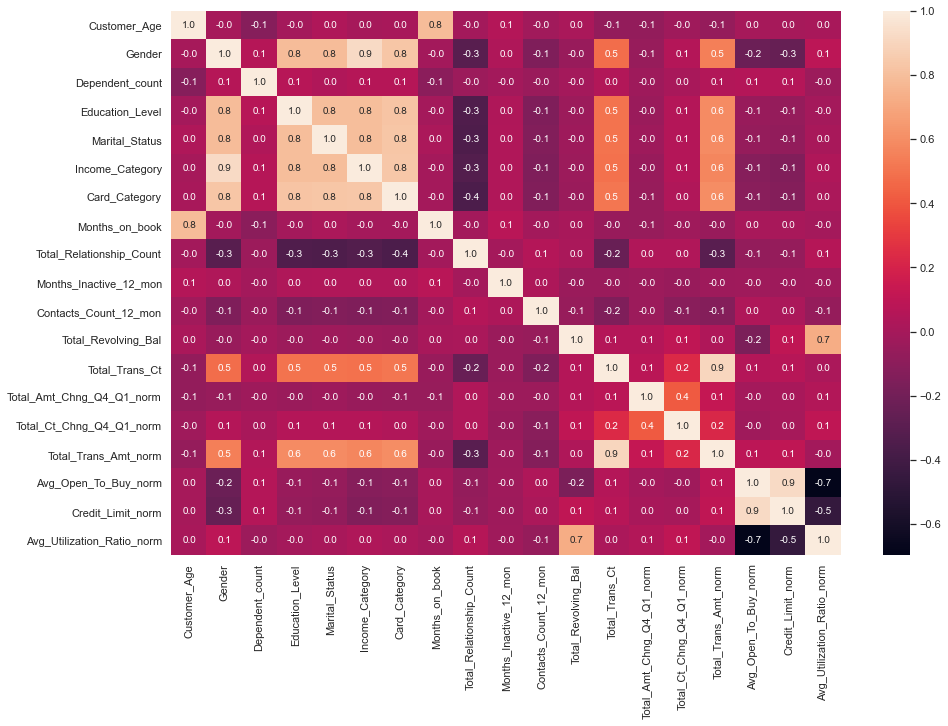

In [69]:
#heat map of correlation of features
correlation_matrix = X.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f')
plt.show()

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_Age                10127 non-null  float64
 1   Gender                      10127 non-null  float64
 2   Dependent_count             10127 non-null  int64  
 3   Education_Level             10127 non-null  float64
 4   Marital_Status              10127 non-null  float64
 5   Income_Category             10127 non-null  float64
 6   Card_Category               10127 non-null  float64
 7   Months_on_book              10127 non-null  float64
 8   Total_Relationship_Count    10127 non-null  int64  
 9   Months_Inactive_12_mon      10127 non-null  int64  
 10  Contacts_Count_12_mon       10127 non-null  int64  
 11  Total_Revolving_Bal         10127 non-null  float64
 12  Total_Trans_Ct              10127 non-null  int64  
 13  Total_Amt_Chng_Q4_Q1_norm   101

# SMOTE

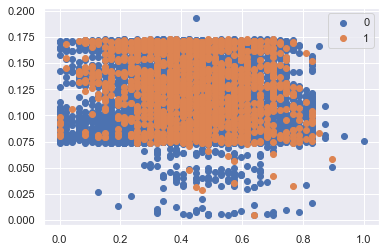

In [71]:
from collections import Counter
from numpy import where
counter = Counter(y)
X_ = np.asarray(X)
y_ = np.asarray(y)
# visualise the classes
for label, items in counter.items():
     row = where(y_ == label)[0]
     plt.scatter(X_[row, 0], X_[row, 1], label=str(label))
plt.legend()
plt.show()

In [72]:
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 8500, 1: 1627})
Counter({0: 8500, 1: 8500})


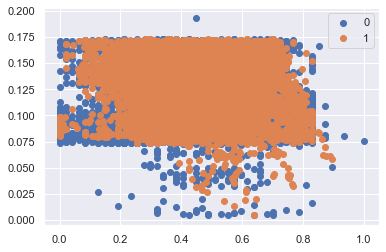

In [73]:
#Visualize again so see the distribution again
counter = Counter(y)
X_ = np.asarray(X)
y_ = np.asarray(y)
# visualise the classes
for label, items in counter.items():
     row = where(y_ == label)[0]
     plt.scatter(X_[row, 0], X_[row, 1], label=str(label))
plt.legend()
plt.show()

## 3. Classification models
- classical classification models
- deep neural networks

### Splitting the Training and Testing sets 

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [75]:
print("",X.shape, '\n',y.shape)

 (17000, 19) 
 (17000,)


In [76]:
print("", X_train.shape, X_test.shape, '\n', y_train.shape, '  ', y_test.shape)

 (11900, 19) (5100, 19) 
 (11900,)    (5100,)


In [93]:
#X_train.columns

In [94]:
#y_train

In [77]:
from sklearn.metrics import confusion_matrix

,Classifier,Accuracy_score,Precision_score,Recall_score,F1_score
0,DecisionTreeClassifier,0.964902,0.963615,0.966261,0.964936


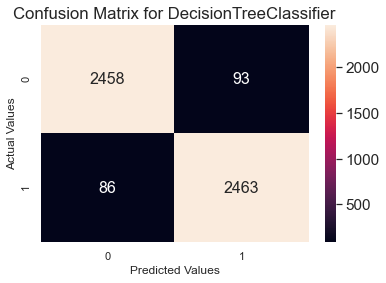

In [78]:
###DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

#Predict
y_pred_tree = tree.predict(X_test)

#Evaluate Model Results on Test Set:
acc_tree = accuracy_score(y_test, y_pred_tree )
prec_tree = precision_score(y_test, y_pred_tree )
rec_tree = recall_score(y_test, y_pred_tree )
f1_tree= f1_score(y_test, y_pred_tree )

#Get the confusion matrix
cf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

#Plot confusion matrix
ax= plt.subplot()
sns.set(font_scale=1.4) # for label size
sns.heatmap(cf_matrix_tree, annot=True, fmt='g',annot_kws={"size": 16}) # font size
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values') 
ax.set_title('Confusion Matrix for DecisionTreeClassifier')

data_tree = {'Classifier':  ['DecisionTreeClassifier'],
        'Accuracy_score': [acc_tree],
        'Precision_score': [prec_tree], 
        'Recall_score': [rec_tree],
        'F1_score': [f1_tree]
           }

comparison_tree = pd.DataFrame (data_tree, columns = ['Classifier','Accuracy_score','Precision_score', 'Recall_score',
                                                    'F1_score'])
comparison_tree

,Classifier,Accuracy_score,Precision_score,Recall_score,F1_score
0,SVM,0.954118,0.934334,0.976854,0.955121


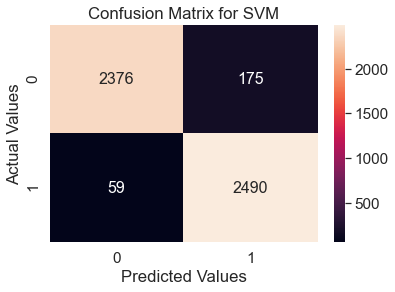

In [79]:
#SVM

from sklearn.svm import SVC 
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)

#Predict
y_pred_svm= svm.predict(X_test)

#Evaluate Model Results on Test Set:
acc_svm = accuracy_score(y_test, y_pred_svm )
prec_svm = precision_score(y_test, y_pred_svm )
rec_svm = recall_score(y_test, y_pred_svm )
f1_svm= f1_score(y_test, y_pred_svm )

#Get the confusion matrix
cf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

#Plot confusion matrix
ax= plt.subplot()
sns.set(font_scale=1.4) # for label size
sns.heatmap(cf_matrix_svm, annot=True, fmt='g',annot_kws={"size": 16}) # font size
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values') 
ax.set_title('Confusion Matrix for SVM')

data_svm = {'Classifier':  ['SVM'],
        'Accuracy_score': [acc_svm],
        'Precision_score': [prec_svm], 
        'Recall_score': [rec_svm],
        'F1_score': [f1_svm]
           }

comparison_svm = pd.DataFrame (data_svm, columns = ['Classifier','Accuracy_score','Precision_score', 'Recall_score',
                                                    'F1_score'])
comparison_svm

,Classifier,Accuracy_score,Precision_score,Recall_score,F1_score
0,RandomForestClassifier,0.986078,0.985502,0.986661,0.986081


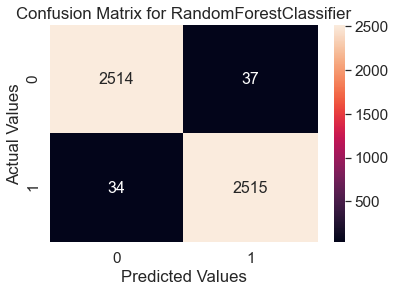

In [80]:
###RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rnd = RandomForestClassifier()
rnd.fit(X_train, y_train)

#Predict
y_pred_rnd = rnd.predict(X_test)

#Evaluate Model Results on Test Set:
acc_rnd = accuracy_score(y_test, y_pred_rnd )
prec_rnd = precision_score(y_test, y_pred_rnd )
rec_rnd = recall_score(y_test, y_pred_rnd )
f1_rnd= f1_score(y_test, y_pred_rnd )

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_rnd)

#Plot confusion matrix
ax= plt.subplot()
sns.set(font_scale=1.4) # for label size
sns.heatmap(cf_matrix, annot=True, fmt='g',annot_kws={"size": 16}) # font size
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values') 
ax.set_title('Confusion Matrix for RandomForestClassifier')

data_rnd = {'Classifier':  ['RandomForestClassifier'],
        'Accuracy_score': [acc_rnd],
        'Precision_score': [prec_rnd], 
        'Recall_score': [rec_rnd],
        'F1_score': [f1_rnd]
           }

comparison_rnd = pd.DataFrame (data_rnd, columns = ['Classifier','Accuracy_score','Precision_score', 'Recall_score',
                                                    'F1_score'])
comparison_rnd

,Classifier,Accuracy_score,Precision_score,Recall_score,F1_score
0,KNeighborsClassifier,0.915882,0.866528,0.983131,0.921154


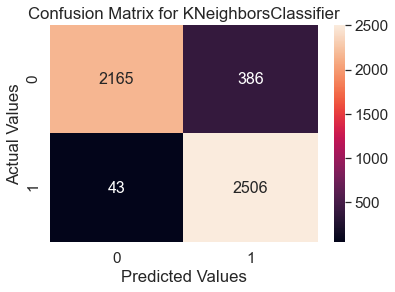

In [81]:
##KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train )

#Predict
y_pred_knn = knn_model.predict(X_test)

#Evaluate Model Results on Test Set:
acc_knn = accuracy_score(y_test, y_pred_knn )
prec_knn = precision_score(y_test, y_pred_knn )
rec_knn = recall_score(y_test, y_pred_knn )
f1_knn = f1_score(y_test, y_pred_knn )

#Get the confusion matrix
cf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

#Plot confusion matrix
ax= plt.subplot()
sns.set(font_scale=1.4) # for label size
sns.heatmap(cf_matrix_knn, annot=True, fmt='g',annot_kws={"size": 16}) # font size
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values') 
ax.set_title('Confusion Matrix for KNeighborsClassifier')

data_knn = {'Classifier':  ['KNeighborsClassifier'],
        'Accuracy_score': [acc_knn],
        'Precision_score': [prec_knn], 
        'Recall_score': [rec_knn],
        'F1_score': [f1_knn]
           }

comparison_knn = pd.DataFrame (data_knn, columns = ['Classifier','Accuracy_score','Precision_score', 'Recall_score',
                                                    'F1_score'])
comparison_knn

,Classifier,Accuracy_score,Precision_score,Recall_score,F1_score
0,GaussianNB,0.863529,0.88847,0.831306,0.858938


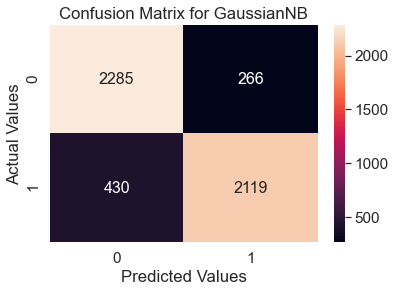

In [82]:
#GaussianNB

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

#Predict
y_pred_gnb = gnb.predict(X_test)

#Evaluate Model Results on Test Set:
acc_gnb = accuracy_score(y_test, y_pred_gnb )
prec_gnb = precision_score(y_test, y_pred_gnb )
rec_gnb = recall_score(y_test, y_pred_gnb )
f1_gnb = f1_score(y_test, y_pred_gnb )

#Get the confusion matrix
cf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

#Plot confusion matrix
ax= plt.subplot()
sns.set(font_scale=1.4) # for label size
sns.heatmap(cf_matrix_gnb, annot=True, fmt='g',annot_kws={"size": 16}) # font size
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values') 
ax.set_title('Confusion Matrix for GaussianNB')

data_gnb = {'Classifier':  ['GaussianNB'],
        'Accuracy_score': [acc_gnb],
        'Precision_score': [prec_gnb], 
        'Recall_score': [rec_gnb],
        'F1_score': [f1_gnb]
           }

comparison_gnb = pd.DataFrame (data_gnb, columns = ['Classifier','Accuracy_score','Precision_score', 'Recall_score',
                                                    'F1_score'])
comparison_gnb

[13:40:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Classifier,Accuracy_score,Precision_score,Recall_score,F1_score
0,XGBClassifier,0.99,0.988654,0.991369,0.99001


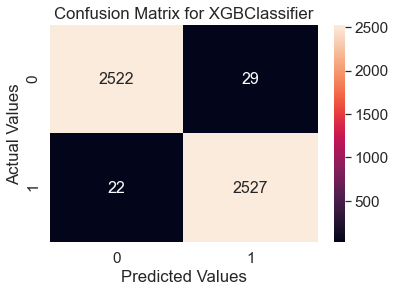

In [83]:
#XG Boost

import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier

use_label_encoder=False 
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

#Predict
y_pred_xgb = xgb.predict(X_test)

#Evaluate Model Results on Test Set:
acc_xgb = accuracy_score(y_test, y_pred_xgb )
prec_xgb = precision_score(y_test, y_pred_xgb )
rec_xgb = recall_score(y_test, y_pred_xgb )
f1_xgb = f1_score(y_test, y_pred_xgb )

#Get the confusion matrix
cf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

#Plot confusion matrix
ax= plt.subplot()
sns.set(font_scale=1.4) # for label size
sns.heatmap(cf_matrix_xgb, annot=True, fmt='g',annot_kws={"size": 16}) # font size
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values') 
ax.set_title('Confusion Matrix for XGBClassifier')

data_xgb = {'Classifier':  ['XGBClassifier'],
        'Accuracy_score': [acc_xgb],
        'Precision_score': [prec_xgb], 
        'Recall_score': [rec_xgb],
        'F1_score': [f1_xgb]
           }

comparison_xgb = pd.DataFrame (data_xgb, columns = ['Classifier','Accuracy_score','Precision_score', 'Recall_score',
                                                    'F1_score'])
comparison_xgb

# Comparison Table

In [85]:
data_total = {'Classifier':  ['DecisionTreeClassifier','SVM','RandomForestClassifier','KNeighborsClassifier','GaussianNB','XGBClassifier'],
        'Accuracy_score': [acc_tree,acc_svm,acc_rnd,acc_knn,acc_gnb,acc_xgb],
        'Precision_score': [prec_tree,prec_svm,prec_rnd,prec_knn,prec_gnb,prec_xgb],
        'Recall_score': [rec_tree,rec_svm,rec_rnd,rec_knn,rec_gnb,rec_xgb],
        'F1_score': [f1_tree,f1_svm,f1_rnd,f1_knn,f1_gnb,f1_xgb]
           }

comparison_total = pd.DataFrame (data_total, columns = ['Classifier','Accuracy_score','Precision_score', 'Recall_score',
                                                    'F1_score'])
comparison_total

,Classifier,Accuracy_score,Precision_score,Recall_score,F1_score
0,DecisionTreeClassifier,0.966078,0.964789,0.967438,0.966112
1,SVM,0.949020,0.932376,0.968223,0.949962
2,RandomForestClassifier,0.985098,0.984332,0.985877,0.985104
3,KNeighborsClassifier,0.912745,0.867575,0.974107,0.917760
4,GaussianNB,0.863137,0.891001,0.827383,0.858015
5,XGBClassifier,0.988235,0.987466,0.989015,0.988240


## 4. Evaluation and comparisons, various metrics

[13:41:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


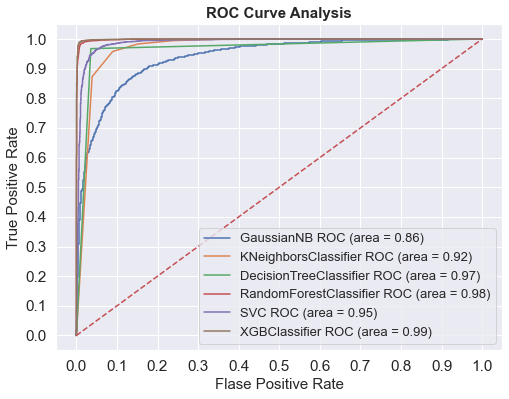

In [84]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_curve, roc_auc_score

from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'GaussianNB',
    'model':GaussianNB(),
},
{
    'label': 'KNeighborsClassifier',
    'model':KNeighborsClassifier(),
},
{
    'label': 'DecisionTreeClassifier',
    'model':DecisionTreeClassifier(),
},
{
    'label': 'RandomForestClassifier',
    'model': RandomForestClassifier(),
},
{
    'label': 'SVC',
    'model': SVC(gamma='auto',probability=True),
},

{
    'label': 'XGBClassifier',
    'model': XGBClassifier(),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0.0, 1.1, step=0.1))
#plt.ylim([0.0, 1.05])
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()   # Display

In [85]:
#check
auc_xgb = roc_auc_score(y_test, y_pred_xgb)
auc_xgb

0.99000053671673

## 5. Hyperparameter Optimization

In [90]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [94]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

estimator = XGBClassifier()
    

parameters = {
    'max_depth': [2, 10, 20,'None'],
    'n_estimators':[10, 50, 100,150,200],
    'learning_rate': [0.1, 0.01, 0.05,'None'],
    'min_child_weight':[5,50,100,'None']
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = -1,
    cv = 10,
    verbose=5
)



grid_search.fit(X_train,
         y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits
[15:07:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9987466983946313
{'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 200}


In [95]:
y_pred_grid = grid_search.best_estimator_.predict(X_test)

In [100]:
# Manual Model optimization 

model = XGBClassifier(max_depth = 3,
                     subsample = 1,
                     n_estimators = 600, #increase n_estimators
                     learning_rate = 0.05,#decrease learning_rate 
                     min_child_weight = 1,
                     random_state=5,
                     reg_alpha = 0,                    
                     reg_lambda = 1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_predict = model.predict(X_train)

print('\nAccuracy on the training subset ',(model.score(X_train, y_train)))
print('Accuracy on the test subset:', (model.score(X_test, y_test)))

[15:56:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy on the training subset  0.9916806722689075
Accuracy on the test subset: 0.985686274509804


## 6. Final evaluations and comparisons
- the best model - analyze it in details, evaluate it with different train/test splits. Is it robust enough

## 7. Discussion, Concusions, Future improvements
- which features are the most important
- how will you explain the model to the management of the bank
- how much benefit/improvement should the bank expect